### Loading datasets

In [1]:
import os
import pandas as pd
# Base directory where your dataset is stored
base_directory = '/kaggle/input/apt-unraveled/Week5_Day6_06272021/Week5_Day6_06272021'

# Exclude Week 1 and list CSV files from Weeks 2 to 6
csv_files = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# Load all CSV files from relevant weeks
dataframes = [pd.read_csv(file) for file in csv_files]
combined_data = pd.concat(dataframes, ignore_index=True)


# Check label distribution for balance
signature_counts = combined_data['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = combined_data['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = combined_data['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Signature distribution:
Signature
APT    6148
AA     4466
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       52620
Active Scanning: Scanning IP Blocks           4462
Encrypted Channel: Symmetric Cryptography     2660
Maintain Access                               2157
Data Transfer Size Limits                     1331
Active Scanning: Vulnerability Scanning          4
Name: count, dtype: int64
Stage distribution:
Stage
Benign                52620
Reconnaissance         4466
Establish Foothold     2660
Lateral Movement       2157
Data Exfiltration      1331
Name: count, dtype: int64


In [2]:
combined_data.shape

(63234, 89)

In [3]:
combined_data.columns

Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst

In [4]:
combined_data.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_is_guessed,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Activity,Stage,DefenderResponse,Signature
0,0,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,60689,8.8.8.8,fa:16:3e:b5:c4:4c,fa:16:3e,53,...,0,tile-service.weather.microsoft.com,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN
1,1,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,62264,184.30.179.31,fa:16:3e:b5:c4:4c,fa:16:3e,80,...,0,tile-service.weather.microsoft.com,NaN,NaN,Microsoft-WNS/10.0,text/xml,Normal,Benign,Benign,NaN
2,2,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,46190,10.8.10.84,fa:16:3e:b5:c4:4c,fa:16:3e,443,...,1,NaN,NaN,NaN,NaN,NaN,Maintain Access,Lateral Movement,Benign,APT
3,3,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123,162.159.200.1,fa:16:3e:b5:c4:4c,fa:16:3e,123,...,0,NaN,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN
4,4,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123,50.205.244.20,fa:16:3e:b5:c4:4c,fa:16:3e,123,...,0,NaN,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN


### Chosing Label "Signature".

In [5]:
combined_data['Signature'] = combined_data['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(combined_data['Signature'].value_counts())

Signature
Non-APT    57086
APT         6148
Name: count, dtype: int64


### Droping irrevalent columns.

In [6]:
columns_to_drop = ['id','Activity', 'Stage',
       'DefenderResponse', 'Signature']
# Drop the identified columns from the DataFrame
df_cleaned = combined_data.drop(columns=columns_to_drop)

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63234 entries, 0 to 63233
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   expiration_id                 63234 non-null  int64  
 1   src_ip                        63234 non-null  object 
 2   src_mac                       63234 non-null  object 
 3   src_oui                       63234 non-null  object 
 4   src_port                      63234 non-null  int64  
 5   dst_ip                        63234 non-null  object 
 6   dst_mac                       63234 non-null  object 
 7   dst_oui                       63234 non-null  object 
 8   dst_port                      63234 non-null  int64  
 9   protocol                      63234 non-null  int64  
 10  ip_version                    63234 non-null  int64  
 11  vlan_id                       63234 non-null  int64  
 12  tunnel_id                     63234 non-null  int64  
 13  b

### Numeric columns

In [8]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_numerics = df_cleaned.drop(columns=['src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type'])

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_numerics.shape)

Shape of DataFrame after dropping correlated features: (63234, 70)


In [9]:
df_numerics.head(5)

,expiration_id,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0,53,17,4,0,0,1624820683947,1624820683964,17,2,...,0,0,0,0,0,0,0,0,0,0
1,0,80,6,4,0,0,1624820683972,1624820744010,60038,11,...,1,1,0,0,0,5,2,0,1,0
2,0,443,6,4,0,0,1624820685998,1624820686069,71,8,...,1,0,0,0,0,4,1,0,1,1
3,0,123,17,4,0,0,1624820862169,1624820862199,30,2,...,0,0,0,0,0,0,0,0,0,0
4,0,123,17,4,0,0,1624820755441,1624820817154,61713,4,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding to targeted label.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = combined_data["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 0 ... 1 1 1]


### IP features convertion.

In [11]:
import pandas as pd
import numpy as np
import ipaddress
# import category_encoders as ce

# Sample DataFrame for demonstration
# df_cleaned = pd.read_csv('your_dataset.csv')  # Assuming you load your data this way
non_numeric_columns = ['src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']

# List of non-numeric columns

# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip = df_cleaned[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip['src_ip'] = df_ip['src_ip'].apply(validate_and_convert_ip)
df_ip['dst_ip'] = df_ip['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip['src_ip'].fillna(-1, inplace=True)
df_ip['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip

/tmp/ipykernel_34/1390817584.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_34/1390817584.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,src_ip,dst_ip
0,0.752563,0.031373
1,0.752563,0.719218
2,0.752563,0.039185
3,0.752563,0.635251
4,0.752563,0.198455
...,...,...
63229,0.039078,0.937500
63230,0.039078,0.937500
63231,0.039078,0.937500
63232,0.039078,0.937500


### Other non-numeric conversion

In [12]:
import category_encoders as ce

# Opt-in to the future behavior for downcasting
pd.set_option('future.no_silent_downcasting', True)

# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ['src_mac', 'src_oui', 'src_port', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']

# Select the non-IP non-numeric columns
df_non_numeric = df_cleaned[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y)

### All features

In [13]:
# Combine the encoded IP and non-IP columns with other numeric features
X = pd.concat([df_ip, encoded_non_ip, df_numerics], axis=1)

# Check the resulting dataframe
X.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0.752563,0.031373,0.884482,0.902774,0.916565,0.881909,0.872252,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.752563,0.719218,0.884482,0.902774,0.916565,0.881909,0.872252,1.000000,1.000000,1.000000,...,1,1,0,0,0,5,2,0,1,0
2,0.752563,0.039185,0.884482,0.902774,0.774714,0.881909,0.872252,0.399199,0.665742,0.827763,...,1,0,0,0,0,4,1,0,1,1
3,0.752563,0.635251,0.884482,0.902774,1.000000,0.881909,0.872252,1.000000,1.000000,0.827763,...,0,0,0,0,0,0,0,0,0,0
4,0.752563,0.198455,0.884482,0.902774,1.000000,0.881909,0.872252,1.000000,1.000000,0.827763,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(63234, 84)

In [15]:
X.columns

Index(['src_ip', 'dst_ip', 'src_mac', 'src_oui', 'src_port', 'dst_mac',
       'dst_oui', 'application_name', 'application_category_name',
       'requested_server_name', 'client_fingerprint', 'server_fingerprint',
       'user_agent', 'content_type', 'expiration_id', 'dst_port', 'protocol',
       'ip_version', 'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst

### Data Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# under_sampling = ClusterCentroids(random_state=random_state)

# X_resampled, y_resampled = under_sampling.fit_resample(X_scaled, Y)

# print(pd.Series(y_resampled).value_counts())

In [17]:
X_resampled.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,1.0,0.532321,0.784951,0.0,0.664754,0.692016,0.0,1.0,1.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1.0,0.887339,0.784951,0.0,0.664754,0.692016,0.0,1.0,1.0,1.0,...,0.166667,0.5,0.0,0.0,0.0,0.001195,0.000834,0.0,0.5,0.0
2,1.0,0.536354,0.784951,0.0,0.094786,0.692016,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.0,0.0,0.0,0.000956,0.000417,0.0,0.5,1.0
3,1.0,0.844000,0.784951,0.0,1.000000,0.692016,0.0,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,1.0,0.618557,0.784951,0.0,1.000000,0.692016,0.0,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [18]:
X_resampled.shape

(63234, 84)

In [19]:
y_resampled = Y

### Class Distribution

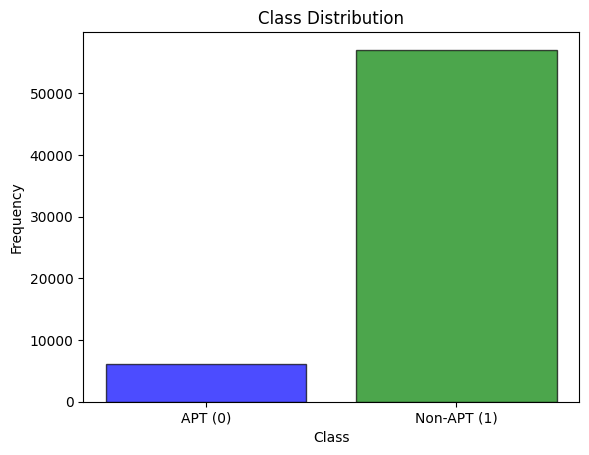

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(Y_resampled):
    classes = ['APT (0)', 'Non-APT (1)']
    counts = np.bincount(Y_resampled)
    
    plt.figure()
    plt.bar(classes, counts, color=['blue', 'green'], edgecolor='k', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.show()

# Assuming Y_resampled_pred is defined
plot_class_distribution(y_resampled)


### Training CNN

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Define the CNN model
def create_cnn_model(input_shape):
    input_layer = Input(shape=input_shape)
    
    conv_output = Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer='l2')(input_layer)
    conv_output = MaxPooling1D(pool_size=2)(conv_output)
    conv_output = Dropout(0.5)(conv_output)
    
    conv_output = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer='l2')(conv_output)
    conv_output = MaxPooling1D(pool_size=2)(conv_output)
    conv_output = Dropout(0.5)(conv_output)
    
    flat_output = Flatten()(conv_output)
    dense_output = Dense(32, activation='relu', kernel_regularizer='l2')(flat_output)
    dense_output = Dropout(0.5)(dense_output)
    
    output = Dense(1, activation='sigmoid')(dense_output)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape data for CNN
X_resampled_np = X_resampled.to_numpy()
X_resampled_np_reshaped = X_resampled_np.reshape((X_resampled_np.shape[0], X_resampled_np.shape[1], 1))

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_resampled_np_reshaped):
    X_train, X_val = X_resampled_np_reshaped[train_index], X_resampled_np_reshaped[val_index]
    Y_train, Y_val = y_resampled[train_index], y_resampled[val_index]

    # Create and compile the CNN model
    model = create_cnn_model((X_resampled_np_reshaped.shape[1], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = 'best_model.keras'
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping, model_checkpoint, reduce_lr]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)




2024-06-21 04:23:12.922356: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 04:23:12.922520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 04:23:13.189939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Training Bi-LSTM

In [21]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Define the Bi-LSTM model
def create_bilstm_model(input_shape):
    input_layer = Input(shape=input_shape)
    
    lstm_output = LSTM(64, return_sequences=True, kernel_regularizer='l2')(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32, kernel_regularizer='l2')(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    output = Dense(1, activation='sigmoid')(lstm_output)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape data for Bi-LSTM
X_resampled_np = X_resampled.to_numpy()
X_resampled_np_reshaped = X_resampled_np.reshape((X_resampled_np.shape[0], X_resampled_np.shape[1], 1))

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_resampled_np_reshaped):
    X_train, X_val = X_resampled_np_reshaped[train_index], X_resampled_np_reshaped[val_index]
    Y_train, Y_val = y_resampled[train_index], y_resampled[val_index]

    # Create and compile the Bi-LSTM model
    model = create_bilstm_model((X_resampled_np_reshaped.shape[1], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = 'best_model.keras'
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping, model_checkpoint, reduce_lr]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

2024-06-20 04:56:05.316411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 04:56:05.316518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 04:56:05.445928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 84, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 84, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9012 - loss: 0.4801 - val_accuracy: 0.9041 - val_loss: 0.3161 - learning_rate: 0.0010
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8991 - loss: 0.3324 - val_accuracy: 0.9041 - val_loss: 0.3160 - learning_rate: 0.0010
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9029 - loss: 0.3255 - val_accuracy: 0.9041 - val_loss: 0.3160 - learning_rate: 0.0010
Epoch 4/20
1580/1581 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9042 - loss: 0.3211
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9042 - loss: 0.3211 - val_accuracy: 0.9041 - val_loss: 0.3160 - learning_rate: 0.0010
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9014 - loss: 0.3256 - val_accuracy: 0.9041 - val_loss: 0.3161 - learning_rate: 1.0000e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accu

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 84, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 84, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 84, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8992 - loss: 0.4824 - val_accuracy: 0.9020 - val_loss: 0.3211 - learning_rate: 0.0010
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9044 - loss: 0.3215 - val_accuracy: 0.9020 - val_loss: 0.3215 - learning_rate: 0.0010
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9035 - loss: 0.3224 - val_accuracy: 0.9020 - val_loss: 0.3212 - learning_rate: 0.0010
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9028 - loss: 0.3236 - val_accuracy: 0.9020 - val_loss: 0.3209 - learning_rate: 0.0010
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9014 - loss: 0.3259 - val_accuracy: 0.9020 - val_loss: 0.3211 - learning_rate: 0.0010
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9015 - loss: 0.3259 - val_accuracy: 0.9020 - val_loss: 0.3214 - learning_rate: 0.0010
Epoch 7/20
1577/1581 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 84, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 84, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 84, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9024 - loss: 0.4787 - val_accuracy: 0.9044 - val_loss: 0.3164 - learning_rate: 0.0010
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9009 - loss: 0.3305 - val_accuracy: 0.9044 - val_loss: 0.3155 - learning_rate: 0.0010
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9000 - loss: 0.3300 - val_accuracy: 0.9044 - val_loss: 0.3155 - learning_rate: 0.0010
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9044 - loss: 0.3194 - val_accuracy: 0.9044 - val_loss: 0.3157 - learning_rate: 0.0010
Epoch 5/20
1577/1581 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9028 - loss: 0.3223
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9028 - loss: 0.3223 - val_accuracy: 0.9044 - val_loss: 0.3156 - learning_rate: 0.0010
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 84, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 84, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 84, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9037 - loss: 0.4743 - val_accuracy: 0.9039 - val_loss: 0.3164 - learning_rate: 0.0010
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9019 - loss: 0.3273 - val_accuracy: 0.9039 - val_loss: 0.3185 - learning_rate: 0.0010
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9724 - loss: 0.1093 - val_accuracy: 0.9998 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9865 - loss: 0.0708 - val_accuracy: 1.0000 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9969 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9986 - loss: 0.0166 - val_accuracy: 1.0000 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accurac

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 84, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 84, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 84, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9030 - loss: 0.4734 - val_accuracy: 0.8995 - val_loss: 0.3267 - learning_rate: 0.0010
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9023 - loss: 0.3276 - val_accuracy: 0.8995 - val_loss: 0.3267 - learning_rate: 0.0010
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9026 - loss: 0.3245 - val_accuracy: 0.8995 - val_loss: 0.3262 - learning_rate: 0.0010
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9052 - loss: 0.3181 - val_accuracy: 0.8995 - val_loss: 0.3263 - learning_rate: 0.0010
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9041 - loss: 0.3198 - val_accuracy: 0.8995 - val_loss: 0.3262 - learning_rate: 0.0010
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9036 - loss: 0.3201
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy

### Training with Auto Encoder and Bi-Lstm

In [21]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Define the stacked autoencoder
def create_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dropout(0.5)(encoded)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dropout(0.5)(encoded)
    
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dropout(0.5)(decoded)
    decoded = Dense(input_shape[0], activation='sigmoid')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    
    return autoencoder, encoder

# Define the Bi-LSTM model
def create_bilstm_model(input_shape):
    input_layer = Input(shape=input_shape)
    
    lstm_output = LSTM(64, return_sequences=True)(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32)(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    output = Dense(1, activation='sigmoid')(lstm_output)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape data for autoencoder
X_resampled_np = X_resampled.to_numpy()
X_resampled_np_flat = X_resampled_np.reshape((X_resampled_np.shape[0], -1))

# Create autoencoder
autoencoder, encoder = create_autoencoder((X_resampled_np_flat.shape[1],))

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# Train autoencoder
autoencoder.fit(X_resampled_np_flat, X_resampled_np_flat, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

# Encode data using the trained encoder
X_encoded = encoder.predict(X_resampled_np_flat)
X_encoded = X_encoded.reshape((X_encoded.shape[0], X_encoded.shape[1], 1))  # Reshape for LSTM

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_encoded):
    X_train, X_val = X_encoded[train_index], X_encoded[val_index]
    Y_train, Y_val = y_resampled[train_index], y_resampled[val_index]

    # Create and compile the Bi-LSTM model
    model = create_bilstm_model((X_encoded.shape[1], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = 'best_model.keras'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[EarlyStopping(patience=5), checkpoint]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)



2024-06-13 16:27:44.911125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 16:27:44.911248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 16:27:45.025170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,836 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,292 (149.58 KB)

 Trainable params: 38,292 (149.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
 84/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1282

I0000 00:00:1718296081.320340     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0867 - val_loss: 0.0086
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - val_loss: 0.0056
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 - val_loss: 0.0047
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - val_loss: 0.0038
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0031
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0027
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0025
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0023
Epoch 9/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 10/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 11/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 12/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9502 - loss: 0.1737 - val_accuracy: 0.9886 - val_loss: 0.0411
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9939 - loss: 0.0208 - val_accuracy: 0.9997 - val_loss: 0.0024
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9997 - val_loss: 0.0024
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9977 - loss: 0.0104 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9999 - val_loss: 7.2392e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.9899 - val_loss: 0.0544
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9977 - los

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9454 - loss: 0.1818 - val_accuracy: 0.9950 - val_loss: 0.0164
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9949 - loss: 0.0193 - val_accuracy: 0.9990 - val_loss: 0.0057
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9952 - loss: 0.0171 - val_accuracy: 0.9983 - val_loss: 0.0059
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9964 - loss: 0.0135 - val_accuracy: 0.9987 - val_loss: 0.0052
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9970 - loss: 0.0114 - val_accuracy: 0.9999 - val_loss: 8.6160e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9999 - val_loss: 7.5478e-04
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 7.2456e-04
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.99

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9541 - loss: 0.1593 - val_accuracy: 0.9925 - val_loss: 0.0261
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9994 - val_loss: 0.0043
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9972 - loss: 0.0099 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9981 - loss: 0.0090 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9952 - loss: 0.0201 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9984 - loss: 0.0073 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9997 - loss: 0

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9456 - loss: 0.1894 - val_accuracy: 0.9998 - val_loss: 0.0024
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9950 - loss: 0.0191 - val_accuracy: 0.9934 - val_loss: 0.0192
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9959 - loss: 0.0152 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 0.9999 - val_loss: 1.9111e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9993 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 1.2385e-04
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9996 -

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9530 - loss: 0.1658 - val_accuracy: 0.9991 - val_loss: 0.0102
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9993 - val_loss: 0.0059
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9982 - loss: 0.0075 - val_accuracy: 0.9997 - val_loss: 0.0029
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9997 - val_loss: 0.0030
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9998 - val_loss: 0.0028
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 1.0000 - loss: 3

### Training Model.

In [21]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def create_bilstm_cnn_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Bi-LSTM branch
    lstm_output = LSTM(64, return_sequences=True)(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32)(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    # CNN branch
    cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    cnn_output = MaxPooling1D(pool_size=2)(cnn_output)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dense(32, activation='relu')(cnn_output)
    cnn_output = Dropout(0.5)(cnn_output)

    # Combine LSTM and CNN branches
    combined = Concatenate()([lstm_output, cnn_output])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape data
X_resampled_np = X_resampled.to_numpy()
X_resampled_np = np.expand_dims(X_resampled_np, axis=2)  # Reshape to (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_resampled_np.shape

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_resampled):
    X_train, X_val = X_resampled_np[train_index], X_resampled_np[val_index]
    Y_train, Y_val = y_resampled[train_index], y_resampled[val_index]

    # Create and compile the model
    model = create_bilstm_cnn_model((n_timesteps, n_features))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = '/kaggle/working/best_model.keras'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[EarlyStopping(patience=5), checkpoint]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    ## New added
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)
    ## New added

    # Evaluate the best model on the validation data
    # results = best_model.evaluate(X_val, Y_val, verbose=0)
    # accuracy_scores.append(results[1])

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)




2024-06-21 10:06:34.027043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 10:06:34.027145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 10:06:34.199198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 82, 64)    │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 84, 64)    │     16,896 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 41, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 84, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2624)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     84,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9815 - loss: 0.0509 - val_accuracy: 0.9999 - val_loss: 7.2356e-04
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9999 - val_loss: 1.1950e-04
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 3.7206e-05
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 5.4823e-05
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 2.0057e-05
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 5.2690e-05
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.5914e-05
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 41, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 84, 64)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │     84,000 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_5[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9871 - loss: 0.0451 - val_accuracy: 0.9999 - val_loss: 9.0556e-05
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 1.6008e-04
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 3.4937e-04
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 1.1021e-04
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 9.6158e-04 - val_accuracy: 1.0000 - val_loss: 4.1075e-05
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9999 - loss: 6.5332e-04 - val_accuracy: 0.9999 - val_loss: 2.2999e-04
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9999 - loss: 5.7185e-04 - val_accuracy: 0.9999 - val_loss: 1.8102e-04
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 41, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 84, 64)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │     84,000 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 32)        │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64)        │          0 │ dropout_9[0][0],  │
│ (Concatenate)       │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_7[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         65 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9833 - loss: 0.0457 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 9.9048e-04
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 0.9998 - val_loss: 8.7097e-04
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 1.4742e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 1.3342e-04
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9999 - loss: 8.3527e-04 - val_accuracy: 1.0000 - val_loss: 1.6180e-05
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/s

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 41, 64)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 84, 64)    │          0 │ lstm_6[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 32)        │     12,416 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │     84,000 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ lstm_7[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64)        │          0 │ dropout_13[0][0], │
│ (Concatenate)       │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9845 - loss: 0.0474 - val_accuracy: 1.0000 - val_loss: 1.6222e-05
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 3.3568e-05
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 7.9400e-04 - val_accuracy: 1.0000 - val_loss: 1.4962e-05
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 5.7103e-05
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 6.7744e-06
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 7.5159e-05
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 4.1245e-06
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 41, 64)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 84, 64)    │          0 │ lstm_8[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 32)        │     12,416 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │     84,000 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32)        │          0 │ lstm_9[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64)        │          0 │ dropout_17[0][0], │
│ (Concatenate)       │                   │            │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dropout_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9998 - val_loss: 0.0043
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9998 - val_loss: 0.0039
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 1.0000 - loss: 3.0334e-04 - val_accuracy: 0.9998 - val_loss: 0.0045
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 6.8666e-04 - val_accuracy: 0.9998 - val_loss: 0.0064
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9997 - val_loss: 0.0043
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 0.0035
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9998 - loss: 7.4388e-04 - val_accuracy: 0.9997 - val_loss: 0.0038
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accura

### Calculate and print average results

In [23]:
# Calculate mean metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1-Score: {mean_f1_score:.4f}')

# Save the best model for future use
final_model_path = '/kaggle/working/final_best_model.keras'
# autoencoder.save('/kaggle/working/autoencoder_model.keras')
best_model.save(final_model_path)

Mean Accuracy: 1.0000
Mean Precision: 1.0000
Mean Recall: 1.0000
Mean F1-Score: 1.0000


### Model Architecture

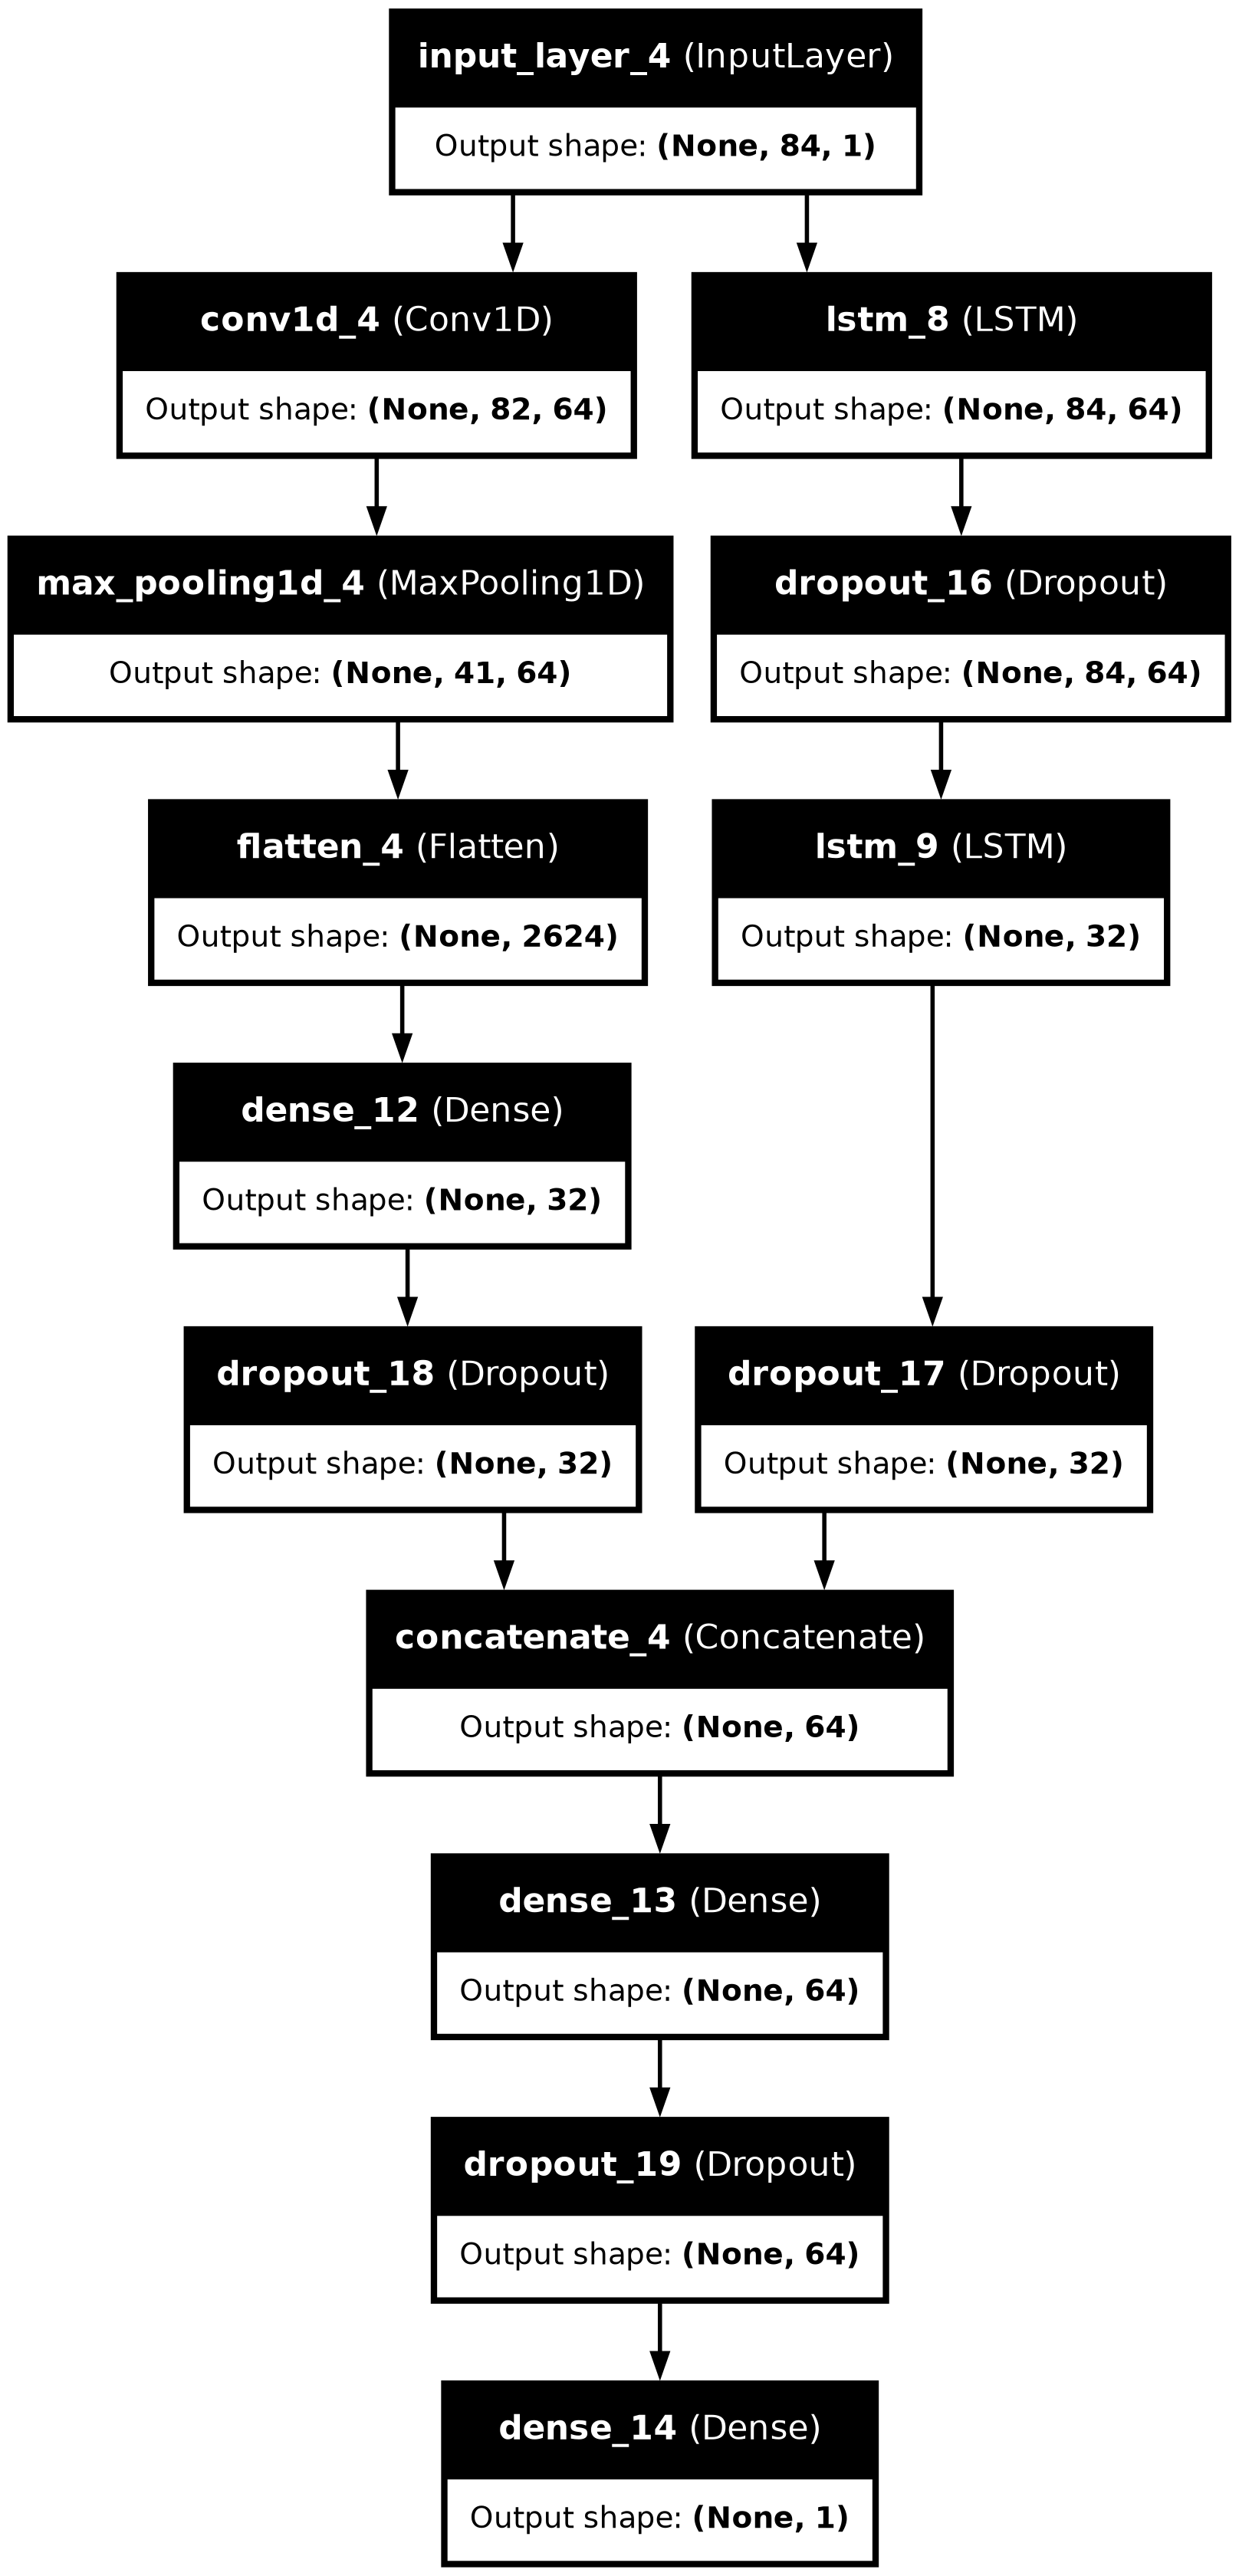

In [24]:
from keras.utils import plot_model
# Visualize the model architecture
plot_model(best_model, to_file='/kaggle/working/model_architecture.png', show_shapes=True, show_layer_names=True)

### Simplified Version

### Auto Encoder

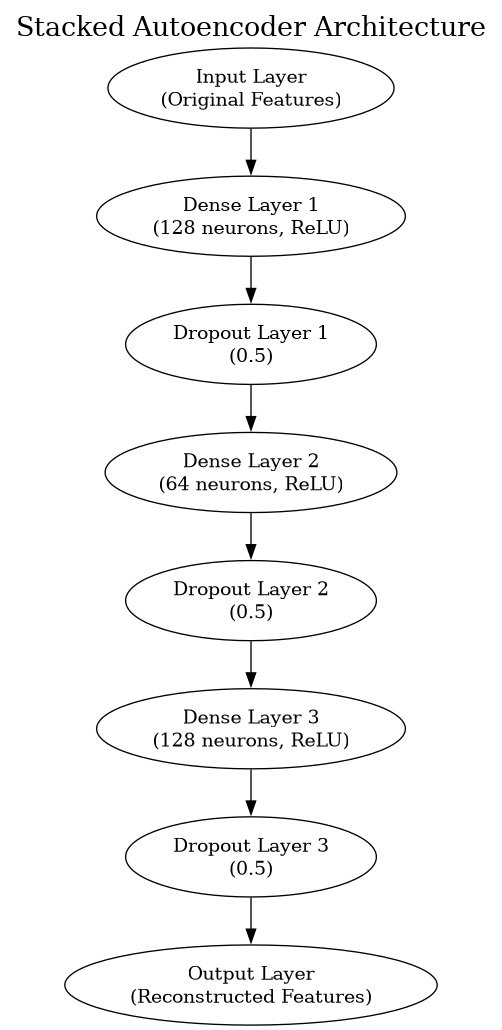

In [27]:
from graphviz import Digraph
from IPython.display import Image

# Create and plot autoencoder architecture
def plot_autoencoder_architecture(autoencoder):
    dot = Digraph(comment='Stacked Autoencoder Model')

    # Title
    dot.attr(label='Stacked Autoencoder Architecture', labelloc='t', fontsize='20')

    # Nodes
    dot.node('A', 'Input Layer\n(Original Features)')
    dot.node('B', 'Dense Layer 1\n(128 neurons, ReLU)')
    dot.node('C', 'Dropout Layer 1\n(0.5)')
    dot.node('D', 'Dense Layer 2\n(64 neurons, ReLU)')
    dot.node('E', 'Dropout Layer 2\n(0.5)')
    dot.node('F', 'Dense Layer 3\n(128 neurons, ReLU)')
    dot.node('G', 'Dropout Layer 3\n(0.5)')
    dot.node('H', 'Output Layer\n(Reconstructed Features)')

    # Edges
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('C', 'D')
    dot.edge('D', 'E')
    dot.edge('E', 'F')
    dot.edge('F', 'G')
    dot.edge('G', 'H')

    # Render the diagram and save as PNG
    file_path = 'stacked_autoencoder_model'
    dot.render(file_path, format='png')
    return Image(filename=file_path + '.png')

# Plot the autoencoder architecture
autoencoder_img = plot_autoencoder_architecture(autoencoder)

# Display the image
display(autoencoder_img)


### Bi-LSTM

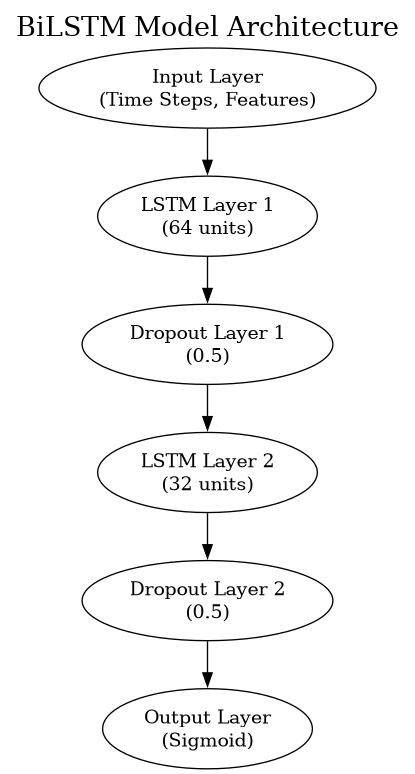

In [30]:
from graphviz import Digraph
from IPython.display import Image

# Create and plot Bi-LSTM architecture
def plot_bilstm_architecture(bilstm_model):
    dot = Digraph(comment='BiLSTM Model')

    # Title
    dot.attr(label='BiLSTM Model Architecture', labelloc='t', fontsize='20')

    # Nodes
    dot.node('A', 'Input Layer\n(Time Steps, Features)')
    dot.node('B', 'LSTM Layer 1\n(64 units)')
    dot.node('C', 'Dropout Layer 1\n(0.5)')
    dot.node('D', 'LSTM Layer 2\n(32 units)')
    dot.node('E', 'Dropout Layer 2\n(0.5)')
    dot.node('F', 'Output Layer\n(Sigmoid)')

    # Edges
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('C', 'D')
    dot.edge('D', 'E')
    dot.edge('E', 'F')

    # Render the diagram and save as PNG
    file_path = 'bilstm_model'
    dot.render(file_path, format='png')
    return Image(filename=file_path + '.png')

# Plot the Bi-LSTM architecture
bilstm_img = plot_bilstm_architecture(best_model)

# Display the image
display(bilstm_img)


### Visualizing Training History

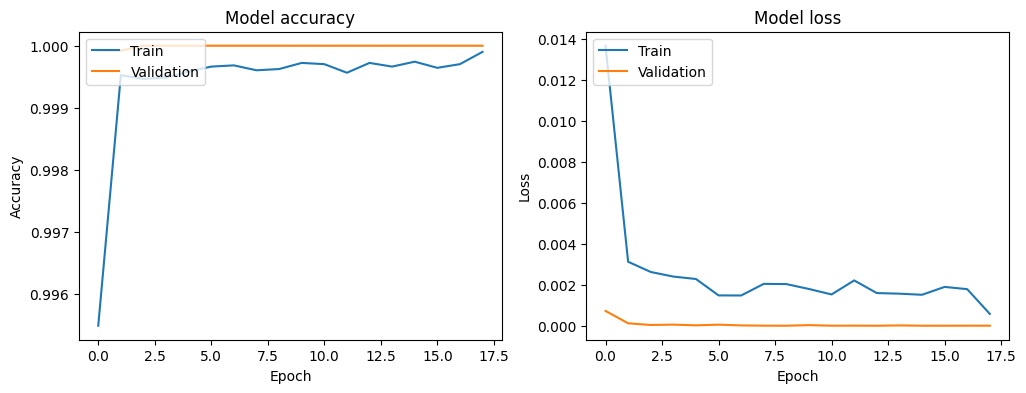

In [25]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss for the best model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Train the model with callbacks
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9998 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 2/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 1.0000 - loss: 3.3382e-04 - val_accuracy: 0.9998 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 3/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 1.0000 - loss: 1.9427e-04 - val_accuracy: 0.9998 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 4/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9998 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 5/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 1.0000 - loss: 3.9395e-04 - val_accuracy: 0.9998 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 6/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9998 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 7/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - a

### Done with training with Bi-LSTM

# Prediction begins

### Importing test dataset

In [26]:
# Base directory where your dataset is stored
dataframe = pd.read_csv('/kaggle/input/test-apt-unraveled/netgw_Flow_labeled_w5_d4.csv')



# Check label distribution for balance
signature_counts = dataframe['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = dataframe['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframe['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)


Signature distribution:
Signature
APT    2921
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       32934
Maintain Access                               2914
Encrypted Channel: Symmetric Cryptography        7
Name: count, dtype: int64
Stage distribution:
Stage
Benign                32934
Lateral Movement       2914
Establish Foothold        7
Name: count, dtype: int64


### Data Shape

In [27]:
dataframe.shape

(35855, 89)

In [28]:
dataframe['Signature'] = dataframe['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(dataframe['Signature'].value_counts())

Signature
Non-APT    32934
APT         2921
Name: count, dtype: int64


### Signature test encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = dataframe["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y_pred = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y_pred)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 1 ... 0 1 1]


### Class Distribution

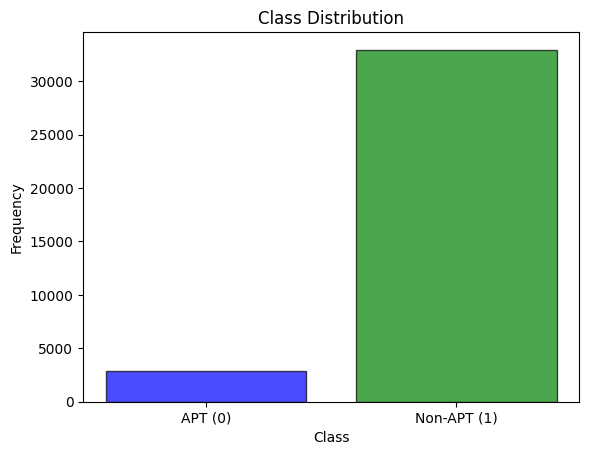

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(Y_resampled_pred):
    classes = ['APT (0)', 'Non-APT (1)']
    counts = np.bincount(Y_resampled_pred)
    
    plt.figure()
    plt.bar(classes, counts, color=['blue', 'green'], edgecolor='k', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.show()

# Assuming Y_resampled_pred is defined
plot_class_distribution(Y_pred)


### selecting numeric data

In [31]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_numerics_pred = dataframe.drop(columns=['id','src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type','Activity', 'Stage','DefenderResponse','Signature'])

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_numerics_pred.shape)

Shape of DataFrame after dropping correlated features: (35855, 70)


In [32]:
df_numerics_pred.columns

Index(['expiration_id', 'dst_port', 'protocol', 'ip_version', 'vlan_id',
       'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat

### working on IP

In [33]:
# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip_pred = dataframe[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip_pred['src_ip'] = df_ip_pred['src_ip'].apply(validate_and_convert_ip)
df_ip_pred['dst_ip'] = df_ip_pred['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip_pred['src_ip'].fillna(-1, inplace=True)
df_ip_pred ['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip_pred 

/tmp/ipykernel_34/2628416595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip_pred['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_34/2628416595.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,src_ip,dst_ip
0,0.752563,0.151935
1,0.752563,0.635251
2,0.752563,0.675187
3,0.752563,0.031373
4,0.752563,0.635251
...,...,...
35850,0.752563,0.031372
35851,0.752563,0.390952
35852,0.752563,0.039185
35853,0.752563,0.031373


### for non-IP

In [34]:
# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ['src_mac', 'src_oui', 'src_port', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']


# Select the non-IP non-numeric columns
df_non_numeric = dataframe[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y_pred)

### Predicted data prepare

In [35]:
# Combine the encoded IP and non-IP columns with other numeric features
X_pred = pd.concat([df_ip_pred , encoded_non_ip, df_numerics_pred], axis=1)

# Check the resulting dataframe
X_pred.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0.752563,0.151935,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0
1,0.752563,0.635251,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0
2,0.752563,0.675187,0.909077,0.918533,0.929133,0.906674,0.906722,0.998535,0.699578,0.784746,...,1,0,0,0,0,3,1,0,1,1
3,0.752563,0.031373,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0
4,0.752563,0.635251,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_pred.shape

(35855, 84)

### Scaling data.

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)


Y_resampled_pred = Y_pred

print(pd.Series(Y_resampled_pred).value_counts())
X_pred.shape

1    32934
0     2921
Name: count, dtype: int64


(35855, 84)

### Reshaping for LSTM

In [44]:
import numpy as np


X_pred_lstm = X_resampled_pred.to_numpy()
X_test_np_flat = X_pred_lstm.reshape((X_pred_lstm.shape[0], -1))

# # Step 2: Encode the test data using the trained encoder
# X_test_encoded = autoencoder.predict(X_test_np_flat)
# X_test_encoded = X_test_encoded.reshape((X_test_encoded.shape[0], X_test_encoded.shape[1], 1))  # Reshape for LSTM


# Display the new shapes
print(f"Training set reshaped for LSTM: {X_resampled_pred.shape}")

Training set reshaped for LSTM: (35855, 84)


### Predictions

In [43]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 84, 64)    │     16,896 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 41, 64)    │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 84, 64)    │          0 │ lstm_10[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ (None, 32)        │     12,416 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │     84,000 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 32)        │          0 │ lstm_11[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 32)        │          0 │ dense_15[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 64)        │          0 │ dropout_21[0][0], │
│ (Concatenate)       │                   │            │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      4,160 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 64)        │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │         65 │ dropout_23[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 353,381 (1.35 MB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,588 (920.27 KB)

In [45]:
X_pred_lstm.shape

(35855, 84)

### Prediction on test dataset

In [46]:
# Make predictions

X_pred_lstm = X_pred_lstm.reshape((X_pred_lstm.shape[0], X_pred_lstm.shape[1], 1))

Y_pred_lstm = best_model.predict(X_pred_lstm)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_lstm > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)


1121/1121 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


### Evaluation

Accuracy: 0.9998
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
Confusion Matrix:
[[ 2914     7]
 [    1 32933]]


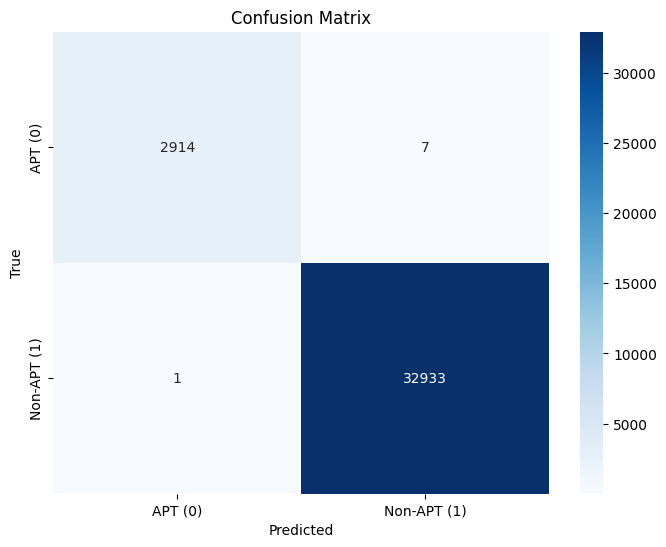

In [47]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['APT (0)', 'Non-APT (1)'], yticklabels=['APT (0)', 'Non-APT (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Auto Encoder & Bi-LSTM

Accuracy: 0.9998
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
Confusion Matrix:
[[ 2914     7]
 [    1 32933]]


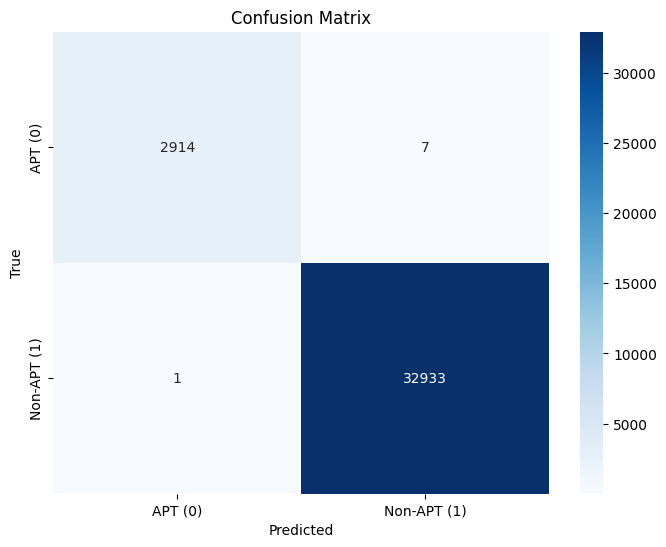

In [48]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['APT (0)', 'Non-APT (1)'], yticklabels=['APT (0)', 'Non-APT (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Precision-Recall Curve

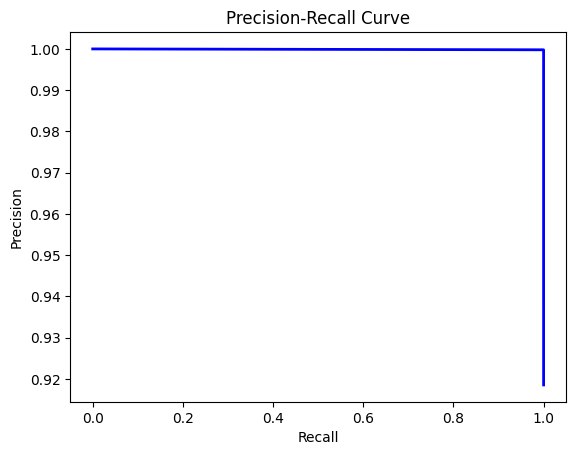

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_curve(Y_resampled_pred, Y_pred_proba):
    precision, recall, _ = precision_recall_curve(Y_resampled_pred, Y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Assuming Y_resampled_pred and Y_pred_proba are defined
plot_precision_recall_curve(Y_resampled_pred, Y_pred_binary)


### Error Analysis.

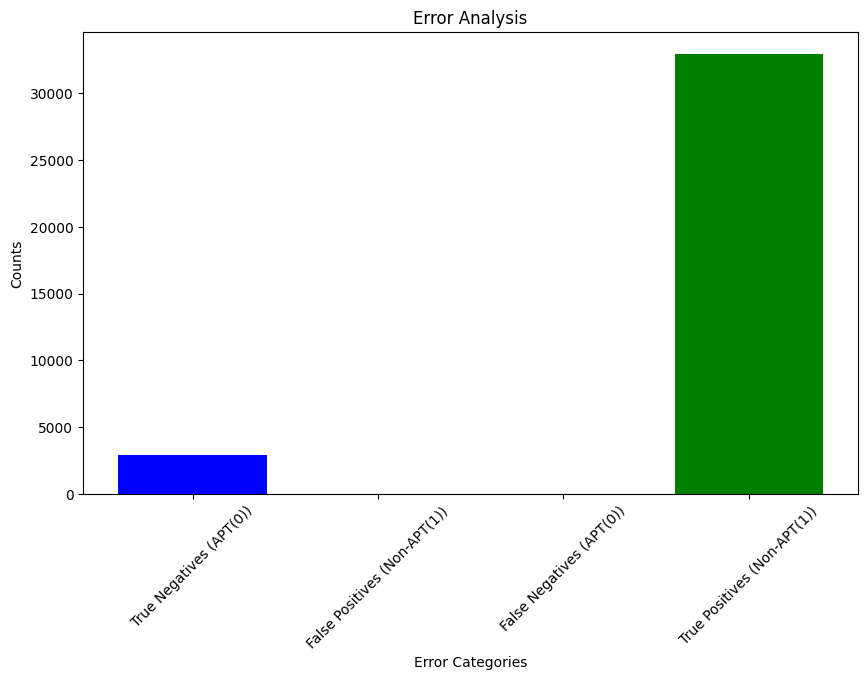

In [50]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['True Negatives (APT(0))', 'False Positives (Non-APT(1))', 
          'False Negatives (APT(0))', 'True Positives (Non-APT(1))']

# Extract values from the confusion matrix
conf_matrix_values = [conf_matrix[0, 0], conf_matrix[0, 1], 
                      conf_matrix[1, 0], conf_matrix[1, 1]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, conf_matrix_values, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Error Categories')
plt.ylabel('Counts')
plt.title('Error Analysis')
plt.xticks(rotation=45)
plt.show()


### On Week 6

In [51]:
# Base directory where your dataset is stored
dataframe = pd.read_csv('/kaggle/input/apt-unraveled/Week6_Day2_06292021/Week6_Day2_06292021/net1013x_Flow_labeled.csv')



# Check label distribution for balance
signature_counts = dataframe['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = dataframe['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframe['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Signature distribution:
Signature
APT    8051
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       62249
Encrypted Channel: Symmetric Cryptography     5780
Data Transfer Size Limits                     2253
Remote System Discovery                         18
Name: count, dtype: int64
Stage distribution:
Stage
Benign                62249
Establish Foothold     5780
Data Exfiltration      2253
Lateral Movement         18
Name: count, dtype: int64


### Targeted label

In [52]:
dataframe['Signature'] = dataframe['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(dataframe['Signature'].value_counts())

Signature
Non-APT    62249
APT         8051
Name: count, dtype: int64


### Encoding label

In [53]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = dataframe["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y_pred = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y_pred)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[0 0 0 ... 1 1 0]


### Numerics

In [54]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_numerics_pred = dataframe.drop(columns=['id','src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type','Activity', 'Stage','DefenderResponse','Signature'])

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_numerics_pred.shape)

Shape of DataFrame after dropping correlated features: (70300, 70)


### IP features

In [55]:
# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip_pred = dataframe[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip_pred['src_ip'] = df_ip_pred['src_ip'].apply(validate_and_convert_ip)
df_ip_pred['dst_ip'] = df_ip_pred['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip_pred['src_ip'].fillna(-1, inplace=True)
df_ip_pred ['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip_pred 

/tmp/ipykernel_34/2628416595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip_pred['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_34/2628416595.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,src_ip,dst_ip
0,0.039078,0.039185
1,0.039078,0.039185
2,0.039078,0.039185
3,0.039078,0.039078
4,0.039078,0.648001
...,...,...
70295,0.039078,0.558507
70296,0.039078,0.406549
70297,0.039078,0.206362
70298,0.039078,0.176746


### Non-IP object features

In [56]:
# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ['src_mac', 'src_oui', 'src_port', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']


# Select the non-IP non-numeric columns
df_non_numeric = dataframe[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y_pred)

### Combine features.

In [57]:
# Combine the encoded IP and non-IP columns with other numeric features
X_pred = pd.concat([df_ip_pred , encoded_non_ip, df_numerics_pred], axis=1)

# Check the resulting dataframe
X_pred.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0.039078,0.039185,0.800637,0.885477,0.851678,0.876709,0.877551,0.591092,0.831212,0.580662,...,1,1,0,0,0,16,4,0,1,0
1,0.039078,0.039185,0.800637,0.885477,0.830796,0.876709,0.877551,0.591092,0.831212,0.580662,...,1,0,0,0,0,5,2,0,1,1
2,0.039078,0.039185,0.694263,0.885477,0.862719,0.876709,0.877551,0.591092,0.831212,0.580662,...,1,0,0,0,0,6,1,0,1,1
3,0.039078,0.039078,0.800637,0.885477,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.039078,0.648001,1.000000,0.885477,1.000000,0.876709,0.877551,1.000000,1.000000,0.580662,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_pred.shape

(70300, 84)

### Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_resampled_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)

# under_sampling = ClusterCentroids(random_state=random_state)

# X_resampled_pred, Y_resampled_pred = under_sampling.fit_resample(X_pred, Y_pred)
Y_resampled_pred = Y_pred

print(pd.Series(Y_resampled_pred).value_counts())
X_pred.shape

1    62249
0     8051
Name: count, dtype: int64


(70300, 84)

### Reshaping for NN

In [60]:
import numpy as np


X_pred_lstm = X_resampled_pred.to_numpy()
X_pred_lstm = np.expand_dims(X_pred_lstm, axis=2) 

# Display the new shapes
print(f"Training set reshaped for LSTM: {X_resampled_pred.shape}")

Training set reshaped for LSTM: (70300, 84)


### Feeding model

In [61]:
# Make predictions
Y_pred_lstm = best_model.predict(X_pred_lstm)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_lstm > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


### Final Evaluation

Accuracy: 0.9997
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9998
Confusion Matrix:
[[ 8030    21]
 [    0 62249]]


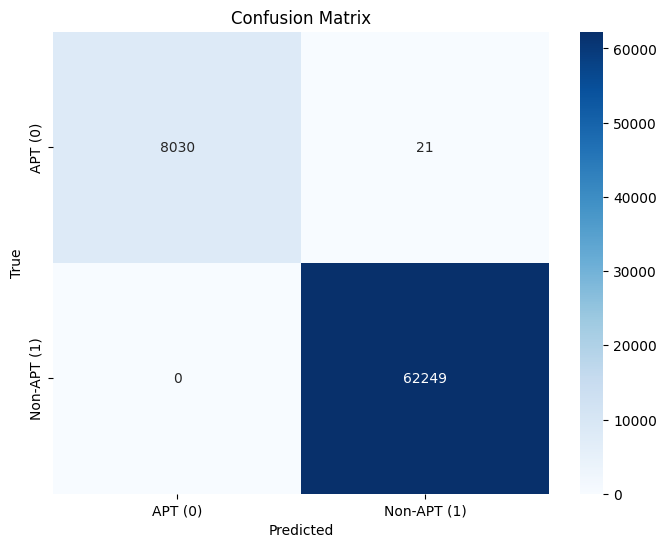

In [62]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['APT (0)', 'Non-APT (1)'], yticklabels=['APT (0)', 'Non-APT (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Error Analysis

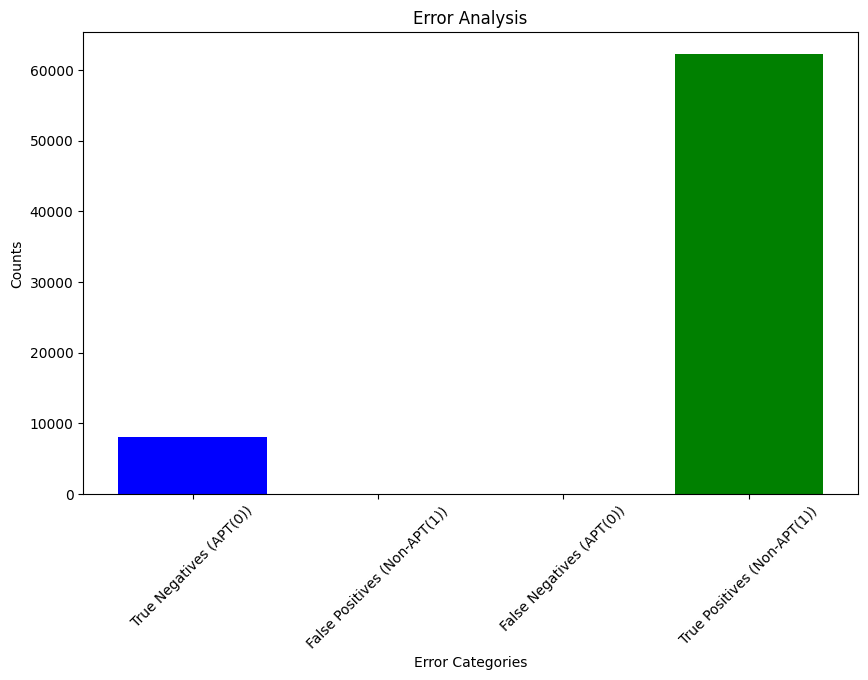

In [64]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['True Negatives (APT(0))', 'False Positives (Non-APT(1))', 
          'False Negatives (APT(0))', 'True Positives (Non-APT(1))']

# Extract values from the confusion matrix
conf_matrix_values = [conf_matrix[0, 0], conf_matrix[0, 1], 
                      conf_matrix[1, 0], conf_matrix[1, 1]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, conf_matrix_values, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Error Categories')
plt.ylabel('Counts')
plt.title('Error Analysis')
plt.xticks(rotation=45)
plt.show()


### Auc-Roc curve

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


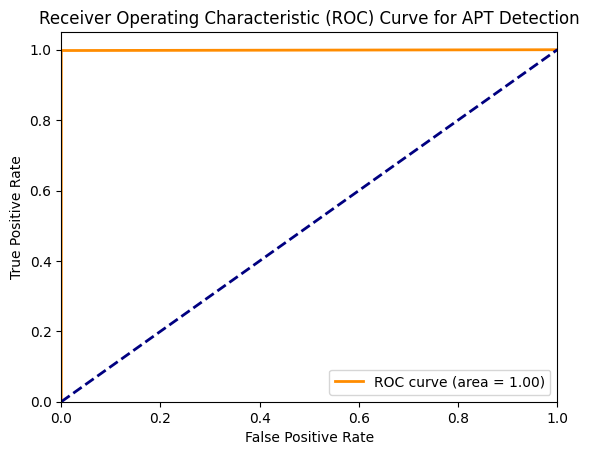

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Y_resampled_pred ===> Ground truth
# Y_pred_proba ===> Predicted probabilities

def plot_roc_curve(Y_resampled_pred, Y_pred_proba):
    # Swap the labels: treat '0' as positive class and '1' as negative class
    Y_resampled_pred_swapped = 1 - Y_resampled_pred
    Y_pred_proba_swapped = 1 - Y_pred_proba
    
    # Compute ROC curve and ROC area for the swapped labels
    fpr, tpr, _ = roc_curve(Y_resampled_pred_swapped, Y_pred_proba_swapped)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for APT Detection')
    plt.legend(loc="lower right")
    plt.show()

# Generate predictions
Y_pred_proba = best_model.predict(X_pred_lstm).ravel()
plot_roc_curve(Y_resampled_pred, Y_pred_proba)
